# QUESTION 1
##  Variation and variability

In [165]:
# importing libraries
import pandas as pd
import numpy as np

In [198]:
# importing the dataset
wages_df = pd.read_excel ('Wages 2020Census cleaned.xlsx')
print (wages_df.head())

   Age     Sex           Marital_status  Number_of_children  Family_size  \
0   30    Male  Married, spouse present                   2            4   
1   28  Female  Married, spouse present     1 child present            3   
2   34    Male  Married, spouse present     1 child present            3   
3   58  Female   Married, spouse absent     1 child present            2   
4   39    Male     Never married/single  0 children present            1   

                 Education-degree_recode  \
0      Masterâ€™s or professional degree   
1      Masterâ€™s or professional degree   
2                    Bachelorâ€™s degree   
3  1 or more years of college, no degree   
4                    Bachelorâ€™s degree   

               Education-degree_recode 2  \
0          Master or professional degree   
1          Master or professional degree   
2                        Bachelor degree   
3  1 or more years of college, no degree   
4                        Bachelor degree   

             

In [214]:
# finding it's sahpe and the summary of the infomation
wages_df.shape
wages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4365 entries, 0 to 4364
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          4365 non-null   int64 
 1   Sex                          4365 non-null   object
 2   Marital_status               4365 non-null   object
 3   Number_of_children           4365 non-null   object
 4   Family_size                  4365 non-null   int64 
 5   Education-degree_recode      4365 non-null   object
 6   Education-degree_recode 2    4365 non-null   object
 7   Education                    4365 non-null   object
 8   Race_ethnicity-multi_recode  4365 non-null   object
 9   Immigrate-year               4365 non-null   int64 
 10  Birthplace_recode            4365 non-null   object
 11  Speaks_English               4365 non-null   object
 12  Employment_status            4365 non-null   object
 13  Income-wages                 4365

In [215]:
 # a) What is a ’typical’ yearly income for these 4,365 people? 
mean_income = wages_df['Income-wages'].mean()
median_income = wages_df['Income-wages'].median()
print(f'The mean is {mean_income}')
print(f' The median is {median_income}')

The mean is 58704.16494845361
 The median is 41000.0


In [216]:
# b)  Do the yearly incomes of these 4,365 people vary? How do you know? 
std_dev_income = wages_df['Income-wages'].std()
min_income = wages_df['Income-wages'].min()
max_income = wages_df['Income-wages'].max()
range_income = max_income - min_income
print(std_dev_income)
print(min_income)
print(max_income)
print(range_income)

68338.0614351565
30
661000
660970


#### c)
If there were no variability in income, it means that all 4,365 people have the same income. In this case:

Standard deviation: The standard deviation would be 0 because there is no spread in the data.
Interquartile range (IQR): Similarly, the IQR would also be 0 because there would be no difference between Q1 and Q3 (they would all be equal).

In [217]:
# Assuming no variability in income, mean = median = Q1 = Q3 = min = max
print("\nIf there were no variability:")
typical_income = wages_df['Income-wages'].iloc[0]  # All incomes are assumed to be the same
print(f"Mean = Median = Q1 = Q3 = Min = Max = {typical_income:}")




If there were no variability:
Mean = Median = Q1 = Q3 = Min = Max = 63000


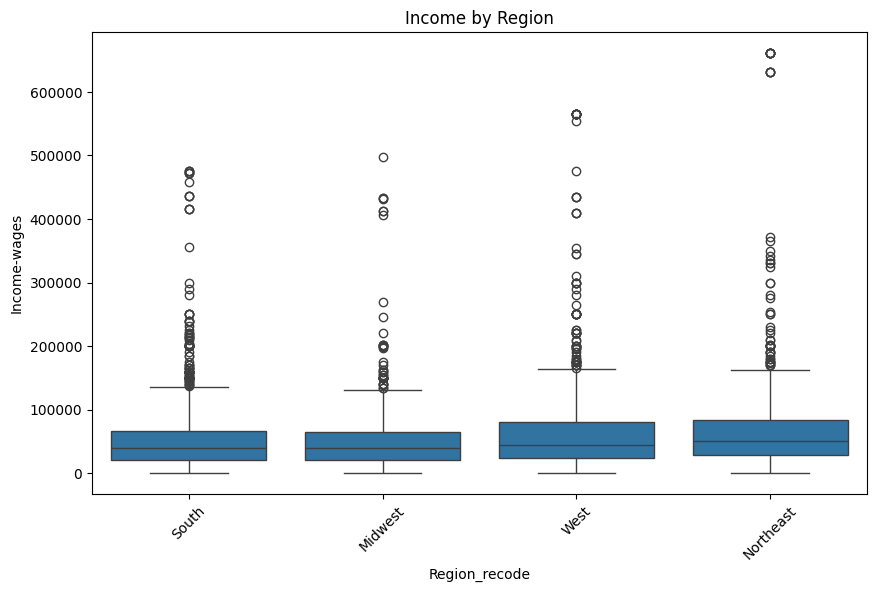

In [218]:
# Boxplot for income by region
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region_recode', y='Income-wages', data=wages_df)
plt.title('Income by Region')
plt.xticks(rotation=45)
plt.show()



In [222]:
# To analyze numerically:
# Group by education level and calculate summary statistics
education_summary = wages_df.groupby('Education')['Income-wages'].describe()
print("\nIncome Summary by Education Level:")
print(education_summary)

# Group by region and calculate summary statistics
region_summary = wages_df.groupby('Region_recode')['Income-wages'].describe()
print("\nIncome Summary by Region:")
print(region_summary)



Income Summary by Education Level:
                                        count           mean            std  \
Education                                                                     
1 or more years of college, no degree   940.0   43912.872340   43801.946631   
Associate or Bachelor degree           1521.0   66324.260355   68490.580580   
HS diploma or GED                       990.0   39983.646465   39070.521919   
Master or PhD or professional degree    613.0  106567.928222  108705.990391   
Some schooling, no HS diploma           301.0   30486.478405   37496.119642   

                                         min      25%      50%       75%  \
Education                                                                  
1 or more years of college, no degree  180.0  17500.0  34400.0   58000.0   
Associate or Bachelor degree           300.0  30000.0  50000.0   80000.0   
HS diploma or GED                       30.0  18000.0  32000.0   50000.0   
Master or PhD or professional 

## Summary citation for number 1:
#### https://www.scribbr.com/statistics/variability/
#### https://www.nobledesktop.com/learn/python/range-iqr-percentile-in-python#:~:text=Range%2C%20IQR%2C%20and%20percentiles%20are,is%20highly%20susceptible%20to%20outliers.

# QUESTION 2
## Exploratory Data Analysis

In [166]:
#importing libraries(Pandas and Numpy)
import pandas as pd
import numpy as np

In [167]:
# importing the students data set using pandas library
student_df = pd.read_csv('student_performance_data.csv')
student_df

,StudentID,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
0,1,Male,24,37,90.75,3.47,Arts,Yes,No
1,2,Female,22,37,74.90,2.32,Education,No,No
2,3,Male,22,10,53.36,2.38,Business,No,No
3,4,Male,24,10,70.26,3.46,Science,Yes,No
4,5,Male,18,19,74.87,2.31,Education,Yes,No
...,...,...,...,...,...,...,...,...,...
495,496,Male,22,37,76.61,2.97,Science,No,No
496,497,Male,23,11,56.29,3.20,Science,No,No
497,498,Female,20,6,56.64,3.20,Science,No,Yes
498,499,Male,22,18,57.18,2.05,Business,No,Yes


In [168]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  500 non-null    int64  
 1   Gender                     500 non-null    object 
 2   Age                        500 non-null    int64  
 3   StudyHoursPerWeek          500 non-null    int64  
 4   AttendanceRate             500 non-null    float64
 5   GPA                        500 non-null    float64
 6   Major                      500 non-null    object 
 7   PartTimeJob                500 non-null    object 
 8   ExtraCurricularActivities  500 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 35.3+ KB


In [169]:
# a)

# Grouping each gender by total study hours per week
grouped_by_gender = student_df.groupby(['Gender', 'Major'])['StudyHoursPerWeek'].sum().reset_index()
#  .sum() aggregates the study hours.
# .reset_index() is for
print(grouped_by_gender)
# printing the new grouped data and the output is each Gender displaying the Major and the total number od Study Hours the took to study

# Getting the highest hours used to study
highest_study_hours_grouped_by_gender = grouped_by_gender.loc[grouped_by_gender.groupby('Gender')['StudyHoursPerWeek'].idxmax()]
# .loc is used to access data in a DataFrame using label-based indexing.
# .idxmax() finds the index of the maximum value for each gender, so we can get the corresponding major.
highest_study_hours_grouped_by_gender
#Calling the variable name inorder to display output which is the Gender row having the Male and female columns, Major row and StudyHoursPerWeek showimg the highest values

   Gender        Major  StudyHoursPerWeek
0  Female         Arts               1070
1  Female     Business               1229
2  Female    Education                818
3  Female  Engineering               1196
4  Female      Science                813
5    Male         Arts                881
6    Male     Business               1130
7    Male    Education               1212
8    Male  Engineering                929
9    Male      Science                660


,Gender,Major,StudyHoursPerWeek
1,Female,Business,1229
7,Male,Education,1212


In [170]:
# b)

# grouping the data set  by gender and getting the mean
grouped_by_gender = student_df.groupby('Gender') ['AttendanceRate'].mean()
# # idxmax() finds the gender with the highest average, 
#.max() retrieves the highest value
highest_attendance_gender = grouped_by_gender.idxmax()
highest_attendance_rate = grouped_by_gender.max()

In [171]:
# c)  What percentage of students have part-time jobs, and what percentage have no part-time jobs? 
part_time_job_count =student_df['PartTimeJob'].value_counts(normalize=True) * 100
# value_counts(normalize=True) counts the occurrences of each unique value (i.e., 'Yes' and 'No') and normalizes it to give a percentage.
print(part_time_job_count)


PartTimeJob
Yes    53.6
No     46.4
Name: proportion, dtype: float64


In [172]:
#d)
 #For each gender, what is the mean GPA and variance of age? 
gpa_and_age_stats_by_gender = student_df.groupby('Gender').agg({'GPA': 'mean', 'Age': 'var'})
gpa_and_age_stats_by_gender
# agg({'GPA': 'mean', 'Age': 'var'}) calculates the mean GPA and the variance of age.


,GPA,Age
Gender,,
Female,2.995352,4.005637
Male,2.974467,3.960130


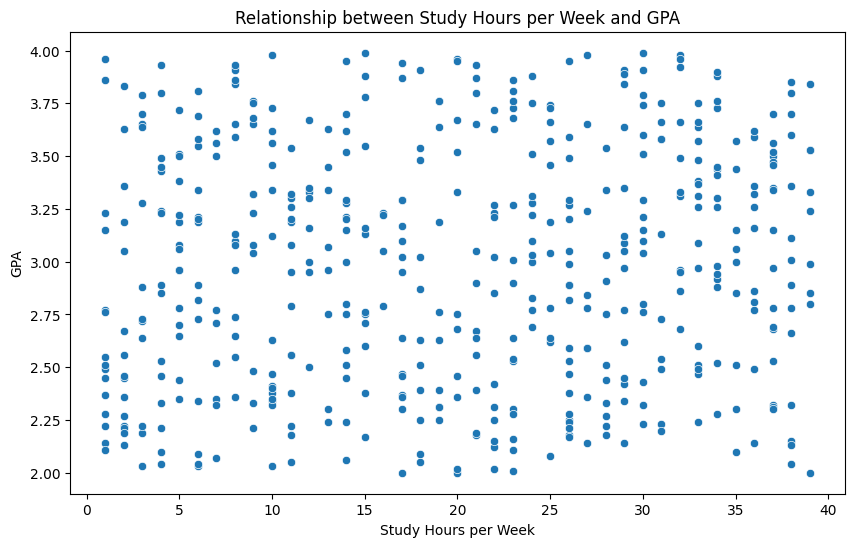

In [173]:
# e)  Create a visualization that effectively shows if there is a relationship between any two variables of your choice. 
#Your answer must be given in a single pipe.
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='StudyHoursPerWeek', y='GPA', data=student_df)
plt.title('Relationship between Study Hours per Week and GPA')
plt.xlabel('Study Hours per Week')
plt.ylabel('GPA')
plt.show()

### Question 2 citations
#### 1. Lecture resource. Notebook 03 Introduction to Pandas for grouping
                                                       
#### 2. Notebook 02 introduction to numpy for the sum and max
    
#### 3. Notebook 04 Introduction to matplot for visualizatiom

# QUSTION 3


a) steps of fitting a linear regression in python

Briefly describe the steps involved in fitting a linear regression in Python? 

1.Import the Libraries. 
        This involves importing the libraries to help solve the equation.
        
2. Import the DataSet 
        This involves importing the involved data set into the jupyter notebook
   
3. Check for any missing data points 
        This helps to reduce errors and if they are there then remove the missing values

   
4. Select Two columns
        This helps to create the dependent and the independent variables inorder to allow us to split them.

   
5. Split the DataSet into two columns
        Split them inorder to divide them to train and test

6. Standardize the Features and Target Variable
        We choose features  the independent variables (predictors), and the target variable . We use .fit_transform for both the x and the y
   
8. Train the Linear Regression Model
         We use LinearRegression() from scikit-learn to create the model and fit it to the training data using .fit().

   
10.  Make Predictions
            Getting the minmam and the maximum
        
11.  Inverse Transform the Predictions
            Inverse reshape and then flatten
12.  Evaluate the Model, and Plot
        We evaluate the model using metrics such as Mean Squared Error (MSE) and R-squared

14.  Plotting the Train and Test Data with the Linear Regression Line

### citation: Notebook 06. Univariate linear regression

b)  What assumptions does the linear regression take into consideration? 

1.Linearity

2.Independence

3. Normality
   
4.Homoscedasticity

### citation: The last lecture during lecture time

In [189]:
#c)
#importing the libraries 
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error
from sklearn.metrics import mean_absolute_error, mean_squared_error 

In [175]:
#  Using the 2020 US Census dataset, train a simple linear regression predicting a continuous target variable using the scikit-learn library. 
# From the output coefficients, generate an equation representing the trained simple linear regression? 

# importing the data set
# Had to install  openpyxl
wages_df = pd.read_excel ('Wages 2020Census cleaned.xlsx')
print (wages_df.head())

# source:https://stackoverflow.com/questions/46599016/reading-xlsx-file-using-jupyter-notebook#comment80150546_46599016

   Age     Sex           Marital_status  Number_of_children  Family_size  \
0   30    Male  Married, spouse present                   2            4   
1   28  Female  Married, spouse present     1 child present            3   
2   34    Male  Married, spouse present     1 child present            3   
3   58  Female   Married, spouse absent     1 child present            2   
4   39    Male     Never married/single  0 children present            1   

                 Education-degree_recode  \
0      Masterâ€™s or professional degree   
1      Masterâ€™s or professional degree   
2                    Bachelorâ€™s degree   
3  1 or more years of college, no degree   
4                    Bachelorâ€™s degree   

               Education-degree_recode 2  \
0          Master or professional degree   
1          Master or professional degree   
2                        Bachelor degree   
3  1 or more years of college, no degree   
4                        Bachelor degree   

             

In [195]:

wages_df.info()
wages_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4365 entries, 0 to 4364
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          4365 non-null   int64 
 1   Sex                          4365 non-null   object
 2   Marital_status               4365 non-null   object
 3   Number_of_children           4365 non-null   object
 4   Family_size                  4365 non-null   int64 
 5   Education-degree_recode      4365 non-null   object
 6   Education-degree_recode 2    4365 non-null   object
 7   Education                    4365 non-null   object
 8   Race_ethnicity-multi_recode  4365 non-null   object
 9   Immigrate-year               4365 non-null   int64 
 10  Birthplace_recode            4365 non-null   object
 11  Speaks_English               4365 non-null   object
 12  Employment_status            4365 non-null   object
 13  Income-wages                 4365

(4365, 19)

In [193]:
# checking for missing values
wages_df.isna().sum()

Age                            0
Sex                            0
Marital_status                 0
Number_of_children             0
Family_size                    0
Education-degree_recode        0
Education-degree_recode 2      0
Education                      0
Race_ethnicity-multi_recode    0
Immigrate-year                 0
Birthplace_recode              0
Speaks_English                 0
Employment_status              0
Income-wages                   0
Region_recode                  0
Region-division_recode         0
Moved                          0
Year                           0
state                          0
dtype: int64

In [177]:
 # Let's assume the target variable is 'Income' and the predictor variable is 'Age' (you can change these)
X = df[['Age']].values.reshape(-1,1)  # This is the predictor variable (it can be more than one column)
y = df['Family_size'].values.reshape(-1,1)   # This is the continuous target variable



In [178]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3492, 1), (873, 1), (3492, 1), (873, 1))

In [179]:
# Standardizing
X_scaler = StandardScaler()  
y_scaler = StandardScaler()  

X_train_scaled = X_scaler.fit_transform(X_train)  
X_test_scaled = X_scaler.transform(X_test)  

y_train_scaled = y_scaler.fit_transform(y_train) 
y_test_scaled = y_scaler.transform(y_test)

y_train_scaled.shape, X_test_scaled.shape, y_train_scaled.shape, y_test_scaled.shape

((3492, 1), (873, 1), (3492, 1), (873, 1))

In [180]:
# Initialize the Linear Regression model
model = LinearRegression()



In [181]:
# Train the model
model.fit(X_train, y_train)
 


LinearRegression()

In [182]:
# predicting 
y_pred_train_scaled = model.predict(X_train)  
y_pred_test_scaled = model.predict(X_test)  

y_pred_train_scaled.min(), y_pred_train_scaled.max()

(np.float64(2.0890806839330383), np.float64(3.510672835671705))

In [183]:
y_pred_train = y_scaler.inverse_transform(y_pred_train_scaled.reshape(-1, 1)).flatten()  
y_pred_test = y_scaler.inverse_transform(y_pred_test_scaled.reshape(-1, 1)).flatten()  

y_pred_train.min(), y_pred_train.max()

(np.float64(6.374980603196887), np.float64(8.673754447312701))

In [184]:
# Get the coefficients and intercept
coef = model.coef_[0]
intercept = model.intercept_



In [185]:
# Output the linear regression equation
print(f"Linear Regression Equation: y = {intercept:} + {coef:} * X")

Linear Regression Equation: y = [3.83103163] + [-0.02002242] * X


In [186]:
#d) Compute the Mean Absolute Error (MSE) from your model
mse_train = mean_squared_error(y_train, y_pred_train)  
mse_test = mean_squared_error(y_test, y_pred_test)  

mae_train = mean_absolute_error(y_train, y_pred_train)  
mae_test = mean_absolute_error(y_test, y_pred_test)  

r2_train = r2_score(y_train, y_pred_train)  
r2_test = r2_score(y_test, y_pred_test)  

print("Training Mean Squared Error:", mse_train)  
  
print()
print("Testing Mean Squared Error:", mse_test)  
print()
print("Training Mean Absolute Error:", mae_train)  
  
print()
print("Testing Mean Absolute Error:", mae_test)  
print()
print("Training R² Score:", r2_train)  
print()
print("Testing R² Score:", r2_test)  

# source:https://stackoverflow.com/questions/66426928/how-to-calculate-mean-absolute-error-mae-and-mean-signed-error-mse-using-pan

Training Mean Squared Error: 26.048578332317422

Testing Mean Squared Error: 27.418178489043143

Training Mean Absolute Error: 4.8707924119506485

Testing Mean Absolute Error: 5.026051504491042

Training R² Score: -8.96188596233459

Testing R² Score: -10.550777942324


In [187]:
# e) Extract and interprete the key outputs from a linear regression model 

coefficients = model.coef_
intercept = model.intercept_

# R-squared value
r2 = model.score(X_test, y_test)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Mean Absolute Error (MAE) and Mean Squared Error (MSE)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the outputs
print(f"Coefficients: {coef}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

#source: https://stackoverflow.com/questions/66055044/how-to-extract-the-coefficients-of-a-linear-model-and-store-in-a-variable
        #lecture resources 06.univariate_linear_regression

Coefficients: [-0.02002242]
Intercept: [3.83103163]
R-squared: 0.00890785992399068
Mean Absolute Error (MAE): 1.2362431932728386
Mean Squared Error (MSE): 2.35256372612981


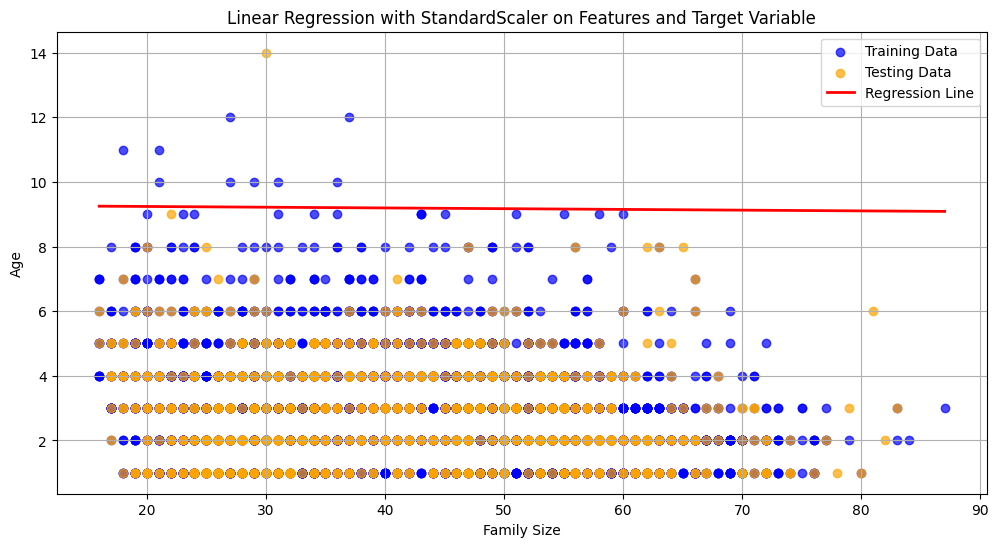

In [188]:
# f)
#Plot the linear regression model
plt.figure(figsize=(12, 6))  

# Scatter Plot for Training and Testing Data  
plt.scatter(X_train, y_train, color='blue', label='Training Data', alpha=0.7)   
plt.scatter(X_test, y_test, color='orange', label='Testing Data', alpha=0.7)  

# Plotting the regression line  
X_line = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)  
X_line_scaled = X_scaler.transform(X_line)  # Scale the line input  
y_line_scaled = model.predict(X_line_scaled)  # Predict the output  
y_line = y_scaler.inverse_transform(y_line_scaled.reshape(-1, 1)).flatten()  # Inverse transform to original scale  

plt.plot(X_line, y_line, color='red', label='Regression Line', linewidth=2)  

# Add titles and labels  
plt.title('Linear Regression with StandardScaler on Features and Target Variable')  
plt.xlabel('Family Size')  
plt.ylabel('Age')  
plt.legend()  
plt.grid()  
plt.show()  

#source: lecture resources 06 univariate linear regrssion

### citation summary for question 3c,d,e,f: 
#### source:https://stackoverflow.com/questions/66426928/how-to-calculate-mean-absolute-error-mae-and-mean-signed-error-mse-using-pan
#### source: https://stackoverflow.com/questions/66055044/how-to-extract-the-coefficients-of-a-linear-model-and-store-in-a-variable
#### lecture resources 06.univariate_linear_regression

# Bonus number

In [223]:
# Given data
A = 8  # Textbooks with compilers
B = 13  # Textbooks with data structures
C = 13  # Textbooks with operating systems
A_and_B = 5  # Textbooks with both compilers and data structures
A_and_C = 3  # Textbooks with both compilers and operating systems
B_and_C = 6  # Textbooks with both data structures and operating systems
A_and_B_and_C = 2  # Textbooks with all three topics




In [228]:
# (a) Textbooks that include material on exactly one of these topics
only_A = A - A_and_B - A_and_C + A_and_B_and_C  # Textbooks with only compilers
only_B = B - A_and_B - B_and_C + A_and_B_and_C  # Textbooks with only data structures
only_C = C - A_and_C - B_and_C + A_and_B_and_C  # Textbooks with only operating systems
# Total number of textbooks that include material on exactly one topic
exactly_one = only_A + only_B + only_C
print("Textbooks with exactly one topic:", exactly_one)


Textbooks with exactly one topic: 12


In [229]:

# (b) Textbooks that do not deal with any of the topics
total_textbooks = 24
at_least_one = A + B + C - A_and_B - A_and_C - B_and_C + A_and_B_and_C  # Textbooks with at least one topic
no_topics = total_textbooks - at_least_one
print("Textbooks with no topics:", no_topics)


Textbooks with no topics: 2


In [227]:
# (c) Textbooks that have no material on compilers
B_or_C = B + C - B_and_C  # Textbooks with either data structures or operating systems (no compilers)
no_compilers = total_textbooks - B_or_C
# Output the results
print("Textbooks with exactly one topic:", exactly_one)
print("Textbooks with no topics:", no_topics)
print("Textbooks with no compilers:", no_compilers)

Textbooks with exactly one topic: 12
Textbooks with no topics: 2
Textbooks with no compilers: 4


## Citations for bonus question
#### Mathematical computing lectures and resouces by madam Breanda